In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
import pyterrier as pt
if not pt.java.started():
    pt.java.init()

import os, sys
os.chdir('/mnt/primary/exposure-fairness')
import config, fair_utils, convert, evaluate

Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
msmarco-passage/dev documents: 100%|██████████| 8841823/8841823 [00:26<00:00, 332692.88it/s]


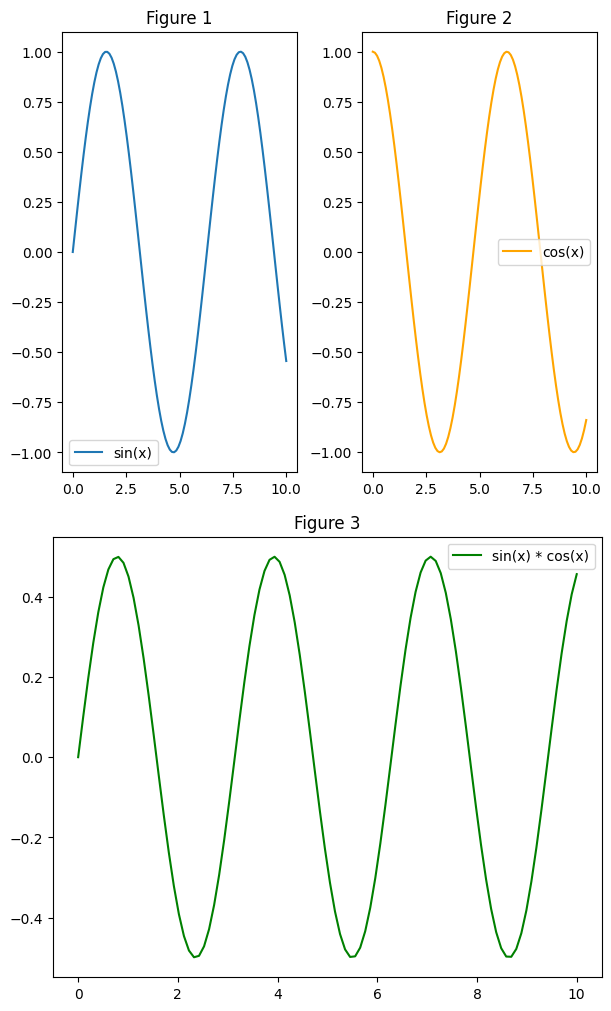

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# Create the main figure
fig = plt.figure(constrained_layout=True, figsize=(6, 10))
subfigs = fig.subfigures(2, 1)  # One column, two rows of subfigures

# First row: two figures side by side
axs1 = subfigs[0].subplots(1, 2)
axs1[0].plot(x, y1, label='sin(x)')
axs1[0].set_title('Figure 1')
axs1[0].legend()

axs1[1].plot(x, y2, label='cos(x)', color='orange')
axs1[1].set_title('Figure 2')
axs1[1].legend()

# Second row: one figure full width
axs2 = subfigs[1].subplots(1, 1)
axs2.plot(x, y3, label='sin(x) * cos(x)', color='green')
axs2.set_title('Figure 3')
axs2.legend()

# Save or show
plt.show()


In [292]:
import importlib
# importlib.reload(config)
importlib.reload(fair_utils)
# importlib.reload(convert)
# importlib.reload(evaluate)

<module 'fair_utils' from '/mnt/primary/exposure-fairness/fair_utils.py'>

In [97]:
modelname = "splade"
granu = 10000
km = config.kmeans_vec[0]
res_path = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}.res'
print(res_path)
print(f'processing {res_path}')
doc_df = fair_utils.convert_res2df(res_path)

query_res_path = f'{config.data_dir}/grouped_queries/clustered_dev_queries_by_{granu}_{km}.res'
q_df = fair_utils.convert_query_res2df(query_res_path)
merged_df = doc_df.merge(q_df[['qid','cluster']], on='qid', how='left')

run_name = os.path.splitext(res_path)[0].split('/')[-1] + '_with_groupid'
merged_file_path = f'{config.data_dir}/{run_name}.res'
fair_utils.convert_df2trec(merged_df,merged_file_path)

processing /mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res
converting /mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res into a dataframe
done
converting /mnt/datasets/cxj/exposure-fairness/grouped_queries/clustered_dev_queries_by_10000_scikit_dense.res into a dataframe
done
saving into /mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100_with_groupid.res
saved


'/mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100_with_groupid.res'

In [98]:
doc_df.head()

,qid,Q0,docid,rank,score,run,docno,query
0,1048578,Q0,7187234,0,1345.927870,splade_msmarco-passage_dev_100,7187234,cost of endless pools swim spa
1,1048578,Q0,2078221,1,1324.328383,splade_msmarco-passage_dev_100,2078221,cost of endless pools swim spa
2,1048578,Q0,5365326,2,1322.672730,splade_msmarco-passage_dev_100,5365326,cost of endless pools swim spa
3,1048578,Q0,4567130,3,1308.076251,splade_msmarco-passage_dev_100,4567130,cost of endless pools swim spa
4,1048578,Q0,5365328,4,1250.860573,splade_msmarco-passage_dev_100,5365328,cost of endless pools swim spa


In [99]:
q_df.head()

,qid,query,cluster
0,1048578,cost of endless pools swim spa,5123
1,1048579,what is pcnt,2941
2,1048580,what is pcb waste,7728
3,1048581,what is pbis,1232
4,1048582,what is paysky,4445


In [110]:
# q_df.shape
# doc_df.shape
# q_df[['qid', 'cluster']].head()
# q_df[q_df['query'] == '']
topics = config.topics
topics[topics['qid'] == '388892']



,qid,query
53300,388892,


In [104]:
merged_df = doc_df.merge(q_df[['qid', 'cluster']], on='qid', how='left')

In [107]:
merged_df[merged_df['query']== ''].head()

,qid,Q0,docid,rank,score,run,docno,query,cluster
5330000,388892,Q0,8332088,0,1019.864300,splade_msmarco-passage_dev_100,8332088,,NaN
5330001,388892,Q0,5324244,1,949.213740,splade_msmarco-passage_dev_100,5324244,,NaN
5330002,388892,Q0,8332089,2,926.069976,splade_msmarco-passage_dev_100,8332089,,NaN
5330003,388892,Q0,7864268,3,919.262918,splade_msmarco-passage_dev_100,7864268,,NaN
5330004,388892,Q0,4132200,4,889.437471,splade_msmarco-passage_dev_100,4132200,,NaN


In [136]:
topics = config.topics
topics[topics['query'] == '']

,qid,query
53300,388892,


In [158]:
:query_path = f'{config.data_dir}/grouped_queries/clustered_dev_queries_by_{granu}_{km}.csv'
print(query_path)
query_df = pd.read_csv(query_path, index_col=0).reset_index()

doc_path = '/mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res'
print(doc_path)
doc_df = convert.convert_res2docdf(doc_path)

merged_df2 = doc_df.merge(query_df[['qid','cluster']], on='qid', how='left')


/mnt/datasets/cxj/exposure-fairness/grouped_queries/clustered_dev_queries_by_10000_scikit_dense.csv
/mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res
converting /mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res into a dataframe
done


In [161]:
csv = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [162]:
df = df.sort_values(by=['qid'])

,qid,docid,docno,score,rank
0,1048578,7187234,7187234,1345.927870,0
1,1048578,2078221,2078221,1324.328383,1
2,1048578,5365326,5365326,1322.672730,2
3,1048578,4567130,4567130,1308.076251,3
4,1048578,5365328,5365328,1250.860573,4


In [159]:
# query_df.head()
query_df[query_df['qid'] == 388892]

,qid,query,cluster
53300,388892,NaN,9989


In [190]:
merged_df2[(merged_df2['qid'] == 388892) ]

,qid,Q0,docid,rank,score,run,cluster
5330000,388892,Q0,8332088,0,1019.864300,splade_msmarco-passage_dev_100,9989
5330001,388892,Q0,5324244,1,949.213740,splade_msmarco-passage_dev_100,9989
5330002,388892,Q0,8332089,2,926.069976,splade_msmarco-passage_dev_100,9989
5330003,388892,Q0,7864268,3,919.262918,splade_msmarco-passage_dev_100,9989
5330004,388892,Q0,4132200,4,889.437471,splade_msmarco-passage_dev_100,9989
5330005,388892,Q0,315209,5,877.450503,splade_msmarco-passage_dev_100,9989
5330006,388892,Q0,5434018,6,868.961125,splade_msmarco-passage_dev_100,9989
5330007,388892,Q0,8332090,7,866.271324,splade_msmarco-passage_dev_100,9989
5330008,388892,Q0,5526580,8,863.445983,splade_msmarco-passage_dev_100,9989
5330009,388892,Q0,1408213,9,861.304322,splade_msmarco-passage_dev_100,9989


In [151]:
merged_df2.head()

,qid,docid,docno,score,rank,cluster
0,1048578,7187234,7187234,1345.927870,0,5123
1,1048578,2078221,2078221,1324.328383,1,5123
2,1048578,5365326,5365326,1322.672730,2,5123
3,1048578,4567130,4567130,1308.076251,3,5123
4,1048578,5365328,5365328,1250.860573,4,5123


TypeError: convert_res2docdf() got an unexpected keyword argument 'columns'

In [167]:
df.head()

,qid,Q0,docid,rank,score,run,cluster
0,199177,Q0,6694981,97,10.922701,bm25_msmarco-passage_dev_100,0
1,743456,Q0,3609042,4,25.286708,bm25_msmarco-passage_dev_100,0
2,743456,Q0,3609038,3,26.386765,bm25_msmarco-passage_dev_100,0
3,743456,Q0,2376243,2,26.572051,bm25_msmarco-passage_dev_100,0
4,743456,Q0,7589344,1,26.984184,bm25_msmarco-passage_dev_100,0


In [168]:
res_path = f'{config.data_dir}/bm25_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}.res'
print(f'processing {res_path}')
doc_df = convert.convert_res2docdf(res_path)

query_path = f'{config.data_dir}/grouped_queries/clustered_dev_queries_by_500_scikit_dense.csv'
query_df = pd.read_csv(query_path, index_col=0).reset_index()
merged_df = doc_df.merge(query_df[['qid', 'cluster']], on='qid', how='left')
merged_df = merged_df.sort_values(by=['cluster'])

processing /mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100.res
converting /mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100.res into a dataframe
done


In [172]:
query_df.columns

Index(['qid', 'query', 'cluster'], dtype='object')

In [171]:
doc_df.columns

Index(['qid', 'Q0', 'docid', 'rank', 'score', 'run'], dtype='object')

In [170]:
merged_df.columns

Index(['qid', 'Q0', 'docid', 'rank', 'score', 'run', 'cluster'], dtype='object')

In [22]:
# csv = '/mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100.csv'
# df = pd.read_csv(csv, index_col=0).reset_index()
csv = f'{config.data_dir}/bm25_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}.csv'
df = pd.read_csv(csv, index_col=0).reset_index()

In [23]:
# df[(df['qid'] == 388892)]
df.head()

,qid,docid,docno,score,rank,query
0,1048578,7187236,7187236,67.528593,0,cost of endless pools swim spa
1,1048578,7471198,7471198,62.121928,1,cost of endless pools swim spa
2,1048578,5365326,5365326,51.958492,2,cost of endless pools swim spa
3,1048578,7187241,7187241,51.947947,3,cost of endless pools swim spa
4,1048578,6802210,6802210,47.925985,4,cost of endless pools swim spa


In [29]:
res = f'{config.data_dir}/splade_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}.res'
print(res)
columns=["qid", "Q0", "docid", "rank", "score", "run"]
df = convert.convert_res2docdf(res, columns=columns)

/mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res
converting /mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.res into a dataframe
done


In [31]:
df.head()

,qid,Q0,docid,rank,score,run
0,1048578,Q0,7187234,0,1345.927870,splade_msmarco-passage_dev_100
1,1048578,Q0,2078221,1,1324.328383,splade_msmarco-passage_dev_100
2,1048578,Q0,5365326,2,1322.672730,splade_msmarco-passage_dev_100
3,1048578,Q0,4567130,3,1308.076251,splade_msmarco-passage_dev_100
4,1048578,Q0,5365328,4,1250.860573,splade_msmarco-passage_dev_100


In [32]:
res = '/mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100_500_scikit_dense_with_groupid.res'
columns=["qid", "Q0", "docid", "rank", "score", "run", "cluster"]
df = convert.convert_res2docdf(res, columns=columns)

converting /mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100_500_scikit_dense_with_groupid.res into a dataframe
done


In [33]:
df.head()

,qid,Q0,docid,rank,score,run,cluster
0,199177,Q0,6694981,97,10.922701,bm25_msmarco-passage_dev_100,0
1,743456,Q0,3609042,4,25.286708,bm25_msmarco-passage_dev_100,0
2,743456,Q0,3609038,3,26.386765,bm25_msmarco-passage_dev_100,0
3,743456,Q0,2376243,2,26.572051,bm25_msmarco-passage_dev_100,0
4,743456,Q0,7589344,1,26.984184,bm25_msmarco-passage_dev_100,0


In [34]:
# df[df['qid'] == 388892]
df[(df['qid'] == 388892) ]

,qid,Q0,docid,rank,score,run,cluster


In [78]:
res = '/mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100_500_scikit_dense_with_groupid.res'
columns=["qid", "Q0", "docid", "rank", "score", "run", "cluster"]
df2 = convert.convert_res2docdf(res, columns=columns)
# columns=["qid", "Q0", "docid", "rank", "score", "run"]
# df2 = convert.convert_res2docdf(res, columns=columns)
df2[df2['qid'] == 388892]

converting /mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100_500_scikit_dense_with_groupid.res into a dataframe
done


,qid,Q0,docid,rank,score,run,cluster


In [80]:
df2.tail()

,qid,Q0,docid,rank,score,run,cluster
10108430,1060109,Q0,8839182,22,17.568175,bm25_msmarco-passage_dev_100,499
10108431,1060109,Q0,1442087,23,17.426964,bm25_msmarco-passage_dev_100,499
10108432,1060109,Q0,3795147,24,17.395200,bm25_msmarco-passage_dev_100,499
10108433,1060109,Q0,7168913,25,17.271212,bm25_msmarco-passage_dev_100,499
10108434,1060109,Q0,4031002,26,17.087777,bm25_msmarco-passage_dev_100,499


In [69]:
df.head()

,qid,Q0,docid,rank,score,run,cluster
0,766473,Q0,4725852,83,537.166061,splade_msmarco-passage_dev_100,0
1,766473,Q0,866130,82,540.176600,splade_msmarco-passage_dev_100,0
2,766473,Q0,12460,81,541.075366,splade_msmarco-passage_dev_100,0
3,766473,Q0,578936,80,541.648549,splade_msmarco-passage_dev_100,0
4,766473,Q0,3666452,99,520.578600,splade_msmarco-passage_dev_100,0


In [70]:
df2.head()

,qid,Q0,docid,rank,score,run
766473,Q0,4725852,83,537.166061,splade_msmarco-passage_dev_100,0
766473,Q0,866130,82,540.176600,splade_msmarco-passage_dev_100,0
766473,Q0,12460,81,541.075366,splade_msmarco-passage_dev_100,0
766473,Q0,578936,80,541.648549,splade_msmarco-passage_dev_100,0
766473,Q0,3666452,99,520.578600,splade_msmarco-passage_dev_100,0


In [64]:
df2[df2['qid'] == 388892]

,qid,Q0,docid,rank,score,run,cluster
7542016,388892,Q0,8332088,0,1019.864300,splade_msmarco-passage_dev_100,364
7542017,388892,Q0,5324244,1,949.213740,splade_msmarco-passage_dev_100,364
7542018,388892,Q0,8332089,2,926.069976,splade_msmarco-passage_dev_100,364
7542019,388892,Q0,7864268,3,919.262918,splade_msmarco-passage_dev_100,364
7542020,388892,Q0,4132200,4,889.437471,splade_msmarco-passage_dev_100,364
7542021,388892,Q0,315209,5,877.450503,splade_msmarco-passage_dev_100,364
7542022,388892,Q0,5434018,6,868.961125,splade_msmarco-passage_dev_100,364
7542023,388892,Q0,8332090,7,866.271324,splade_msmarco-passage_dev_100,364
7542024,388892,Q0,5526580,8,863.445983,splade_msmarco-passage_dev_100,364
7542025,388892,Q0,1408213,9,861.304322,splade_msmarco-passage_dev_100,364


In [48]:
csv = f'{config.data_dir}/splade_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}.csv'
print(csv)
df = pd.read_csv(csv, index_col=0).reset_index()

/mnt/datasets/cxj/exposure-fairness/splade_msmarco-passage_dev_100.csv


In [39]:
df.dtypes

qid        int64
Q0        object
docid      int64
rank       int64
score    float64
run       object
dtype: object

In [52]:
m_df = df.merge(q_df[['qid','cluster']], on='qid', how='left')

In [ ]:
m_df[(m_df['qid'] == 388892)]

In [ ]:
df[(df['qid'] == 388892) ]

In [220]:
csv = '/mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100_rscore.csv'
df  = pd.read_csv(csv, index_col=0).reset_index()

In [221]:
df.head()

,qid,docid,docno,score,rank,query,r_score
0,1048578,7187236,7187236,67.528593,0,cost of endless pools swim spa,1.442695
1,1048578,7471198,7471198,62.121928,1,cost of endless pools swim spa,0.910239
2,1048578,5365326,5365326,51.958492,2,cost of endless pools swim spa,0.721348
3,1048578,7187241,7187241,51.947947,3,cost of endless pools swim spa,0.621335
4,1048578,6802210,6802210,47.925985,4,cost of endless pools swim spa,0.558111


In [145]:
# grouped = df.groupby("docno")['r_score'].sum().reset_index()
#grouped = df.groupby('docno', group_keys=False).apply(lambda x: x)
# grouped = df.groupby('docno').size().reset_index(name='count')
grouped = df.groupby('docid').agg(
    num=('r_score', 'size'),
    sum_r_score=('r_score', 'sum')
).reset_index()
# grouped = df.sort_values(by=['docno'])

In [150]:
grouped = grouped.sort_values(by=['num'], ascending=False)

In [298]:
grouped.head(5)
# grouped[grouped['num']==2].head()

,docno,num,sum_r_score
3306228,6958226,3058,1419.686238
954632,1985345,3006,1222.580300
709057,1474877,2945,1070.106082
3405414,7138532,2873,932.525277
222842,462225,2808,957.015881


In [303]:
grouped_more_100 = grouped[grouped['num']>=100]

In [304]:
grouped_more_100.shape

(1174, 3)

In [178]:
config.corpus_df[config.corpus_df['docno'] == '6958226']['text'].values[0]

'What does de mean? What does derecho mean? What does esta mean? What does Juez mean? What does poder mean? What does por favor mean? What does puede mean? What does que mean? What does ser mean? What does su mean What does tener mean? What does tiene mean? What does un mean? What does usted mean? workers compensation'

In [179]:
config.corpus_df[config.corpus_df['docno'] == '1985345']['text'].values[0]

'What does THOT mean? What does IANAL mean? What does MCM mean on Instagram? What does Ayy LMAO mean? What does WCW mean? What does TBT mean? What does OOTD mean? What does SMH mean? What does OOH KILL ‘EM mean? What does TLDR mean? TL;DR; Plural of Crisis; What does igers mean on Instagram? What does FOH mean on Instagram; What does FBF mean on Instagram? What does FML mean?'

In [180]:
config.corpus_df[config.corpus_df['docno'] == '6949099']['text'].values[0]

'what does embed post mean; what does embed post mean; What does Embed Post mean? What does it mean to embed a post; Related Help Center FAQs; What does it mean to see first? What does active mean in messages on Facebook? What does it mean to Like something? What does it mean to unfollow someone? What does it mean to follow someone or a Page? What does it mean if the pixel status says No activity yet...'

In [ ]:
res = '/mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100_scikit_dense_5000_with_groupid.res'
columns = ['qid', 'Q0', 'docid', 'rank', 'score', 'run', 'cluster']
df = convert.convert_res2docdf(res, columns=columns)
max_retrieved_df = df[df['docid'] == 6958226]

In [228]:
max_retrieved_df['cluster'].nunique()

1412

In [ ]:
max_retrieved_df.head(30)

In [238]:
max_retrieved_df['qid'].values.astype(str)

array(['860529', '1028902', '860728', ..., '1082482', '1082483', '641485'],
      shape=(3058,), dtype='<U21')

In [ ]:
config.topics[config.topics['qid'].isin(max_retrieved_df['qid'].values.astype(str))]

In [240]:
res0 = '/mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100.res'
columns = ['qid', 'Q0', 'docid', 'rank', 'score', 'run']
df0 = convert.convert_res2docdf(res0, columns=columns)
max_retrieved_df0 = df0[df0['docid'] == 6958226]

converting /mnt/datasets/cxj/exposure-fairness/bm25_msmarco-passage_dev_100.res into a dataframe
done


In [251]:
df0_20 = df0.groupby("qid", group_keys=False).head(20).reset_index()

In [ ]:
df0_20.head(21)

In [243]:
max_retrieved_df0 = max_retrieved_df0.sort_values(by=['rank'], ascending=False)

In [295]:
max_retrieved_df0_15_20 = max_retrieved_df0[(max_retrieved_df0['rank'] >= 15) & (max_retrieved_df0['rank'] < 20)]

In [296]:
grouped_more_100[grouped_more_100['docno'] == 8124529]

,docno,num,sum_r_score
4011507,8124529,873,268.061592


In [297]:
max_retrieved_df0_15_20.shape

(216, 6)

In [261]:
df0_filter = df0[(df0['docid'].isin(grouped_more_100['docno'].values.astype(int))) & (df0['rank'] >= 15) & (df0['rank'] < 20)]

In [269]:
df0_filter_20 = df0[~ df0['docid'].isin(df0_filter['docid'])]

In [281]:
df0_filter_20_cut = df0_filter_20.groupby("qid", group_keys=False).head(20).reset_index()

In [282]:
df0_filter_20_cut.shape

(2019808, 7)

In [283]:
convert.convert_docdf2_trec(df0_filter_20_cut,'./df0_filter_20_cut.res', 'df0_filter_20_cut')

saving into ./df0_filter_20_cut.res
saved


In [273]:
convert.convert_docdf2_trec(df0_20,'./df0_20.res', 'df0_20')


saving into ./df0_20.res
saved


In [274]:

qrels_res = f'{config.data_dir}/qrels_dev.res'

/opt/miniconda3/envs/exposure-fairness-py3.10-cuda12.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [293]:
cutted_csv_path = './df0_20.res'
coll_gini = evaluate.evaluate_coll_gini(cutted_csv_path)
evaluate.evaluate_metrics(qrels_res, cutted_csv_path)

loading ./df0_20_rscore.csv
loaded
calc coll_gini
coll_gini: 0.3683


{'map': 0.1735, 'recip_rank': 0.1768, 'P_10': 0.037, 'ndcg_cut_10': 0.2131}

In [294]:
cutted_csv_path = './df0_filter_20_cut.res'
coll_gini = evaluate.evaluate_coll_gini(cutted_csv_path)
evaluate.evaluate_metrics(qrels_res, cutted_csv_path)

loading ./df0_filter_20_cut_rscore.csv
loaded
calc coll_gini
coll_gini: 0.3596


{'map': 0.1741, 'recip_rank': 0.1774, 'P_10': 0.0372, 'ndcg_cut_10': 0.2139}

In [250]:
max_retrieved_df0_15_20.shape

(129, 6)

In [ ]:
max_retrieved_df0.tail(30)

In [200]:
grouped[grouped['num']==1002].head(1)

,docno,num,sum_r_score
3036796,6388529,1002,255.054996


In [201]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '6388529']['text'].values[0]

"What does lobo mean in spanish? already exists. already exists as an alternate of this question. exists and is an alternate of. Are the songs ordered chronologically by when they impacted your life? What does LOBO stand for? What does after mean in Spanish? What does los lobos mean? What is a lobo wolf? What does you ain't no Lobos'' mean? What ..."

In [209]:
grouped[grouped['num']==507].head(1)

,docno,num,sum_r_score
4245256,8614554,507,127.35866


In [210]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '8614554']['text'].values[0]

'What does the Korean word geokjeongma/ geokjeonghajima mean? What does the Korean word niga/ nega mean? Does the word why have different meanings in Korean language?'

In [211]:
grouped[grouped['num']==100].head(1)

,docno,num,sum_r_score
3400416,7130382,100,29.260499


In [212]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '7130382']['text'].values[0]

'What does Arista mean? Arista is a female name, learn about Arista name meaning, its popularity, pronunciation, more information for the meaning of the name Arista and Arista name origin is Greek baby name. What does Arista mean?'

In [213]:
grouped[grouped['num']==50].head(1)

,docno,num,sum_r_score
363517,753114,50,13.693946


In [214]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '753114']['text'].values[0]

'2015 ford f150 order date, how long does it take to get delivery of a new ford truck, how long does it take to order a new ford truck, how long does it take to order a truck from ford, is ford atlas the new f-150, ordered f150 2 weeks ago'

In [215]:
grouped[grouped['num']==10].head(1)

,docno,num,sum_r_score
188404,390643,10,2.52603


In [217]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '390643']['text'].values[0]

'⭕ Heavy Large Circle White Heavy Check Mark ☑ Ballot Box With Check Heavy Check Mark Heavy Multiplication X Cross Mark Cross Mark Button Heavy Plus Sign Heavy Minus Sign Heavy Division Sign Curly Loop ➿ Double Curly Loop 〽 Part Alternation Mark Eight-Spoked Asterisk Eight-Pointed Star Sparkle ‼ Double Exclamation Mark ⁉'

In [218]:
grouped[grouped['num']==5].head(1)

,docno,num,sum_r_score
1235378,2573976,5,1.489996


In [219]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '2573976']['text'].values[0]

'and RNA parts 1 and 2 State which part of a DNA molecule carries the genetic instructions that are unique for each individual? Infer which part of the DNA molecule carries the genetic instructions that are unique for each individual? Duplication of any part of this document is permitted for classroom use only. and college level instruction, lessons on DNA structure and function, cell structure, DNA molecules wound over each other like fibers in yarn. DNA carries genetic information that is'

In [190]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '7130382']['text'].values[0]

'What does Arista mean? Arista is a female name, learn about Arista name meaning, its popularity, pronunciation, more information for the meaning of the name Arista and Arista name origin is Greek baby name. What does Arista mean?'

In [187]:
grouped[grouped['num']==51].head(1)

,docno,num,sum_r_score
2484355,5227811,51,15.866697


In [188]:
config.dataset_corpus_df[config.dataset_corpus_df['docno'] == '5227811']['text'].values[0]

'York County, PA Property Tax information. York County, PA Property Tax Search by Address. See what the tax bill is for any York County, PA property by simply typing its address into a search bar! In-depth Property Tax Information. See York County, PA tax rates, tax exemptions for any property, the tax assessment history for the past years, and more.'

In [170]:
config.corpus_df.head()

,text,docno
0,The presence of communication amid scientific ...,0
1,The Manhattan Project and its atomic bomb help...,1
2,Essay on The Manhattan Project - The Manhattan...,2
3,The Manhattan Project was the name for a proje...,3
4,versions of each volume as well as complementa...,4


In [107]:
grouped.tail()

,docno,r_score
4351495,8841816,2
4351496,8841817,3
4351497,8841818,2
4351498,8841820,2
4351499,8841821,1


In [330]:
from torch import tensor

h = tensor([
    [[1.0, 0.0, 0.0],   # real token
     [0.0, 1.0, 0.0],   # real token
     [0.0, 0.0, 1.0],   # real token
     [9.0, 9.0, 9.0]],  # padding token

    [[2.0, 2.0, 2.0],   # real token
     [1.0, 1.0, 1.0],   # real token
     [0.0, 0.0, 0.0],   # padding
     [0.0, 0.0, 0.0]]   # padding
])

m = tensor([
    [1, 2, 3, 4],  # only first 3 tokens are real
    [10, 20, 30, 40]   # only first 2 tokens are real
])
m2 = tensor([
    [2, 10],  # only first 3 tokens are real
    [3, 100]   # only first 2 tokens are real
])

In [331]:
m2 @ m

tensor([[ 102,  204,  306,  408],
        [1003, 2006, 3009, 4012]])

In [332]:
import numpy as np

array = np.array([[1, 2, 3],
                  [4, 5, 6]])

np.sum(array, axis=1)

array([ 6, 15])

In [310]:
m_sq = m.unsqueeze(-1)
print(m_sq)

tensor([[[1],
         [1],
         [1],
         [0]],

        [[1],
         [1],
         [0],
         [0]]])
